# Functions

log([OIII]/Hb) = 0.61 / (log([NII]/Ha) - 0.05) + 1.3     (Kauffmann+03 line)

log([OIII]/Hb) = 0.61 / (log([NII]/Ha) - 0.47) + 1.19    (Kewley+01 line)

y=(−30.787+1.1358x+0.27297x2) tanh (5.7409x)−31.093 where y=log([OIII]/Hβ), andx=log([NII]/Hα) (Stasińska+06 line)

log([OIII]/Hβ)=1.05 log([NII]/Hα)+0.45 (Schawinski+07 line)

pure star-forming galaxies: log[N II]/Hα< −0.4 and WHα > 3Å

strong AGN (i.e. Seyferts): log[N II]/Hα> −0.4 and WHα > 6Å

weak AGN: log[N II]/Hα> −0.4 and WHα between 3 and 6Å

RGs (i.e. fake AGN): WHα < 3Å

passive galaxies (actually, lineless galaxies): WHα and W[N II] < 0.5Å

In [73]:
def Kauffmann(x):
    return 0.61/(x-0.05)+1.3

def Kewley(x):
    return 0.61/(x-0.47)+1.19

def Stasinska(x):
    # doing this because apparently math.tanh cant handle arrays
    y = []
    for i in range(len(x)):
        y.append((-30.787+1.1358*x[i]+0.27297*x[i]**2)*math.tanh(5.7409*x[i])-31.093)
    return y

def Schawinski(x):
    return 1.05*x+0.45

def horizontal(x, a):
    return 0*x+a

def vertical(y, a):
    return 0*y+a

# Plots parameters

In [74]:
params = {'font.size': 12,
          'figure.figsize': (8.,6.),
         }

# Libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Importing data

In [76]:
data_raw = pd.read_csv('../../Data/Match07_smalldoubleclean_emlines.csv')

In [77]:
data_raw

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,MAG_ABSOLUTE_I,MAG_ABSOLUTE_Z,MAG_ABSOLUTE_Y,MAG_ABSOLUTE_J,MAG_ABSOLUTE_H,MAG_ABSOLUTE_K,UV_CLASS_YI2011,TYPE,BPT_CLASS,WHAN_CLASS
0,585610,588848899914268877,183.6357,-0.180381,3.5,4.62,21.0320,0.0486,2,19.7814,...,-21.790239,-21.937685,-21.534065,-21.671768,-21.333374,-21.381876,RSF,3,SF,SF
1,585622,588848899914334317,183.7372,-0.046642,3.5,4.62,20.2965,0.0263,0,18.8096,...,-20.539217,-20.850392,-20.399912,-20.425870,-20.188683,-19.950501,RSF,3,SF,SF
2,585630,588848899914334392,183.8403,-0.045170,3.5,4.62,20.6158,0.0314,2,19.4969,...,-21.501279,-21.632659,-21.099273,-21.082411,-20.789069,-20.824911,RSF,3,SF,SF
3,585637,588848899914334460,183.7989,-0.059996,3.5,5.28,21.5860,0.1193,2,19.8666,...,-22.577848,-22.980033,-22.429262,-22.649492,-22.521685,-22.513193,RSF,3,NaN,Retired/Passive
4,585667,588848899914399953,183.8874,-0.076773,3.5,5.28,21.0229,0.0584,0,19.8678,...,-22.788999,-23.247800,-22.647159,-22.757948,-22.620589,-22.781031,RSF,3,SF,sAGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14326,585409,588848899913810261,182.6236,-0.118058,3.5,5.28,20.4630,0.0418,0,19.7666,...,-20.191305,-20.612478,-20.227940,-20.381691,-20.215257,-20.145758,RSF,3,LINER,Retired/Passive
14327,585436,588848899913875691,182.8106,-0.015192,3.5,4.62,20.2875,0.0338,2,19.1236,...,-20.870720,-20.911356,-20.521808,-20.436937,-20.165621,-20.073729,RSF,3,SF,SF
14328,585450,588848899913875754,182.8055,-0.045858,3.5,5.28,20.5160,0.0413,2,19.6846,...,-21.427449,-21.770306,-21.332929,-21.604374,-21.472820,-21.495194,RSF,3,SF,SF
14329,585465,588848899913941263,182.8369,-0.154758,3.5,5.28,20.5227,0.0387,2,19.7014,...,-22.046238,-22.454552,-21.799156,-21.927908,-21.851561,-21.915446,RSF,3,SF,SF


# Cleaning data

In [78]:
'''
data = data_raw[(data_raw['HA_FLUX_COMP']!=0) & (data_raw['HA_FLUX_COMP']!=-99999) & 
                (data_raw['HB_FLUX_COMP']!=0) & (data_raw['HB_FLUX_COMP']!=-99999) & 
                (data_raw['NIIR_FLUX_COMP']!=0) & (data_raw['NIIR_FLUX_COMP']!=-99999) & 
                (data_raw['OIIIR_FLUX_COMP']!=0) & (data_raw['OIIIR_FLUX_COMP']!=-99999) & 
                (data_raw['HA_EW_COMP']!=0) & (data_raw['HA_EW_COMP']!=-99999)]
'''

"\ndata = data_raw[(data_raw['HA_FLUX_COMP']!=0) & (data_raw['HA_FLUX_COMP']!=-99999) & \n                (data_raw['HB_FLUX_COMP']!=0) & (data_raw['HB_FLUX_COMP']!=-99999) & \n                (data_raw['NIIR_FLUX_COMP']!=0) & (data_raw['NIIR_FLUX_COMP']!=-99999) & \n                (data_raw['OIIIR_FLUX_COMP']!=0) & (data_raw['OIIIR_FLUX_COMP']!=-99999) & \n                (data_raw['HA_EW_COMP']!=0) & (data_raw['HA_EW_COMP']!=-99999)]\n"

In [79]:
data = data_raw[(data_raw['HA_FLUX_COMP']>0) &
                (data_raw['HB_FLUX_COMP']>0) &
                (data_raw['NIIR_FLUX_COMP']>0) &
                (data_raw['OIIIR_FLUX_COMP']>0) & 
                (data_raw['HA_EW_COMP']>0)]

In [81]:
# when i used the first method it still left very small values or negative values
# which still gave errors later

# Diagrams for all the data

# BPT diagram

In [84]:
x1 = data['NIIR_FLUX_COMP']/data['HA_FLUX_COMP']
y1 = data['OIIIR_FLUX_COMP']/data['HB_FLUX_COMP']

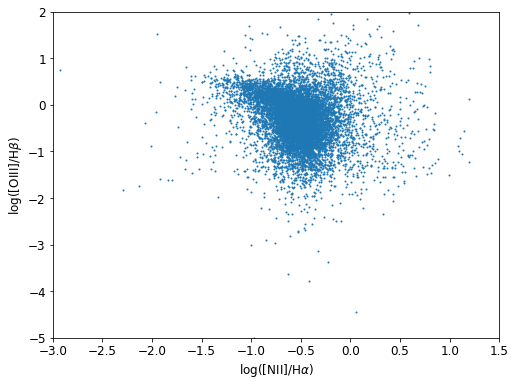

In [85]:
plt.rcParams.update(params)
#np.seterr(invalid='ignore') # to ignore log of negative numbers
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN diagram

In [86]:
x2 = data['NIIR_FLUX_COMP']/data['HA_FLUX_COMP']
y2 = data['HA_EW_COMP']

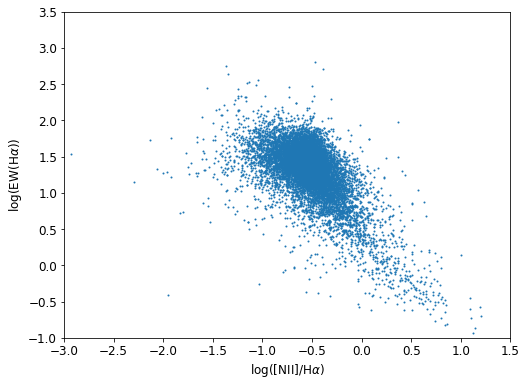

In [87]:
plt.plot(np.log10(x2), np.log10(y2), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Diagrams for RSF

In [88]:
data_rsf = data[data['UV_CLASS_YI2011']=='RSF']

# BPT

In [89]:
x3 = data_rsf['NIIR_FLUX_COMP']/data_rsf['HA_FLUX_COMP']
y3 = data_rsf['OIIIR_FLUX_COMP']/data_rsf['HB_FLUX_COMP']

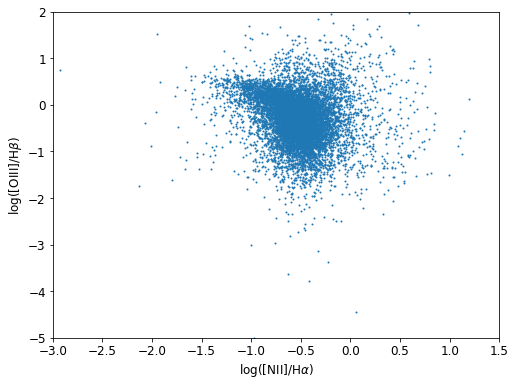

In [90]:
plt.plot(np.log10(x3), np.log10(y3), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN

In [91]:
x4 = data_rsf['NIIR_FLUX_COMP']/data_rsf['HA_FLUX_COMP']
y4 = data_rsf['HA_EW_COMP']

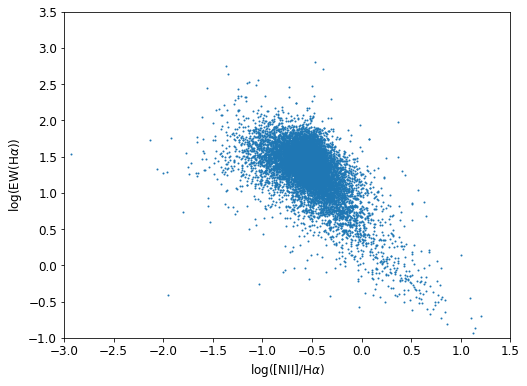

In [92]:
plt.plot(np.log10(x4), np.log10(y4), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Diagrams for UV weak

In [93]:
data_uvweak = data[data['UV_CLASS_YI2011']=='UV_WEAK']

# BPT

In [94]:
x5 = data_uvweak['NIIR_FLUX_COMP']/data_uvweak['HA_FLUX_COMP']
y5 = data_uvweak['OIIIR_FLUX_COMP']/data_uvweak['HB_FLUX_COMP']

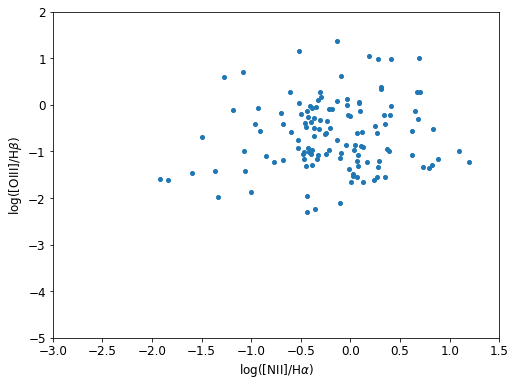

In [106]:
plt.plot(np.log10(x5), np.log10(y5), ls='', marker='o', markersize=4)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN

In [96]:
x6 = data_uvweak['NIIR_FLUX_COMP']/data_uvweak['HA_FLUX_COMP']
y6 = data_uvweak['HA_EW_COMP']

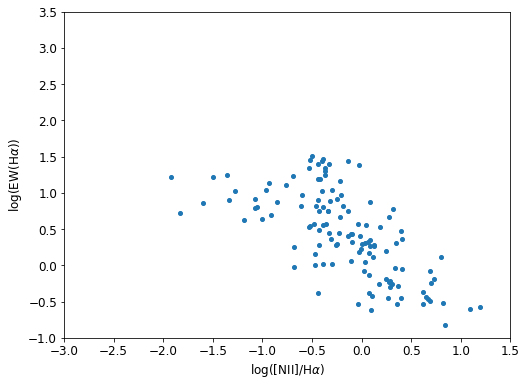

In [107]:
plt.plot(np.log10(x6), np.log10(y6), ls='', marker='o', markersize=4)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Diagrams for UV upturn

In [98]:
data_uvupturn = data[data['UV_CLASS_YI2011']=='UV_UPTURN']

# BPT

In [99]:
x7 = data_uvupturn['NIIR_FLUX_COMP']/data_uvupturn['HA_FLUX_COMP']
y7 = data_uvupturn['OIIIR_FLUX_COMP']/data_uvupturn['HB_FLUX_COMP']

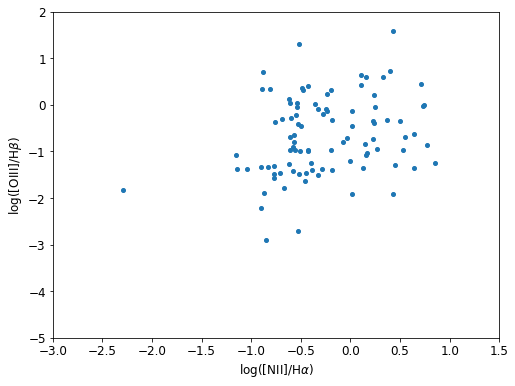

In [108]:
plt.plot(np.log10(x7), np.log10(y7), ls='', marker='o', markersize=4)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN

In [101]:
x8 = data_uvupturn['NIIR_FLUX_COMP']/data_uvupturn['HA_FLUX_COMP']
y8 = data_uvupturn['HA_EW_COMP']

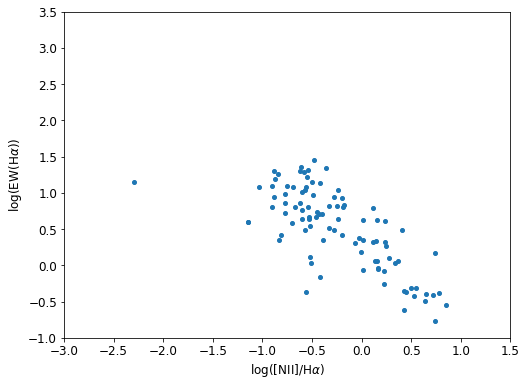

In [109]:
plt.plot(np.log10(x8), np.log10(y8), ls='', marker='o', markersize=4)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Extra plots

In [103]:
palette = ['#66c2a5', '#fc8d62', '#8da0cb']

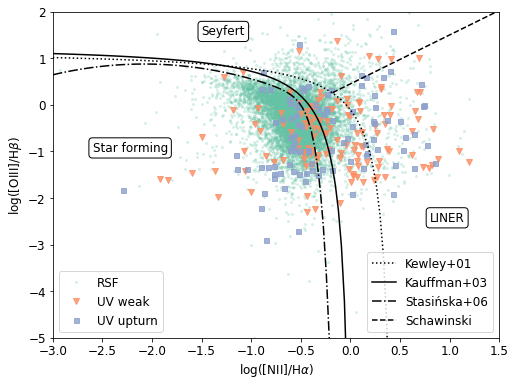

In [116]:
lines = []
lines += plt.plot(np.log10(x3), np.log10(y3), ls='', marker='o', markersize=2, c=palette[0], alpha=0.2, label='RSF')
lines += plt.plot(np.log10(x5), np.log10(y5), ls='', marker='v', markersize=6, c=palette[1], alpha=0.8, label='UV weak')
lines += plt.plot(np.log10(x7), np.log10(y7), ls='', marker='s', markersize=5, c=palette[2], alpha=0.8, label='UV upturn')

xx1 = np.linspace(-3, 0.4, 100)
xx2 = np.linspace(-3, 0, 100)
xx3 = np.linspace(-3, 0, 100)
xx4 = np.linspace(-0.18, 1.5, 100)

lines += plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
lines += plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
lines += plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
lines += plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski')

plt.text(-1.5, 1.5, 'Seyfert', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(-2.6, -1.0, 'Star forming', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(0.8, -2.5, 'LINER', bbox=dict(boxstyle="round", ec='k', fc='w'))

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)

legend1 = plt.legend(lines[:3], ['RSF', 'UV weak', 'UV upturn'], loc='lower left')
plt.legend(lines[3:], ['Kewley+01', 'Kauffman+03', 'Stasińska+06', 'Schawinski'], loc='lower right')
plt.gca().add_artist(legend1)

plt.show()

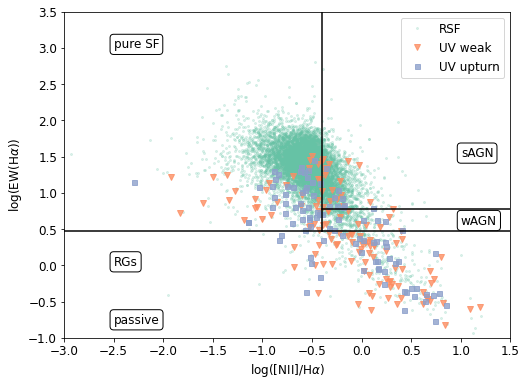

In [105]:
plt.plot(np.log10(x4), np.log10(y4), ls='', marker='o', markersize=2, c=palette[0], alpha=0.2, label='RSF')
plt.plot(np.log10(x6), np.log10(y6), ls='', marker='v', markersize=6, c=palette[1], alpha=0.8, label='UV weak')
plt.plot(np.log10(x8), np.log10(y8), ls='', marker='s', markersize=5, c=palette[2], alpha=0.8, label='UV upturn')

xx5 = np.linspace(-3, -0.4, 100)
xx6 = np.linspace(-0.4, 1.5, 100)
xx7 = np.linspace(np.log10(3), 3.5, 100)

plt.plot(xx5, horizontal(xx5, np.log10(3)), ls='-', c='k') # pure SF
plt.plot(xx6, horizontal(xx6, np.log10(6)), ls='-', c='k') # sAGN
plt.plot(xx6, horizontal(xx6, np.log10(3)), ls='-', c='k') # wAGN
plt.plot(vertical(xx7, -0.4), xx7, ls='-', c='k')

plt.text(-2.5, 3.0, 'pure SF', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(1.0, 1.5, 'sAGN', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(1.0, 0.57, 'wAGN', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(-2.5, 0.0, 'RGs', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(-2.5, -0.8, 'passive', bbox=dict(boxstyle="round", ec='k', fc='w'))

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.legend()
plt.show()